<a href="https://colab.research.google.com/github/sumitsaxena-git/ai-bootcamp/blob/main/Income_class_prediction_with_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to the earlier notebook on income class prediction. We will skip the basics and build on top of the learning with neural nets.

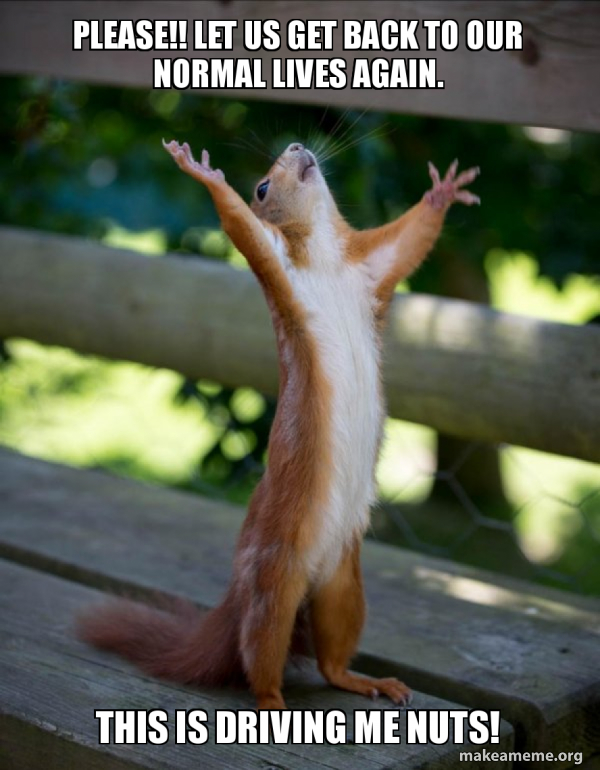

In [ ]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle datasets download -d uciml/adult-census-income
! unzip /content/adult-census-income.zip

100% 450k/450k [00:00<00:00, 844kB/s]
100% 450k/450k [00:00<00:00, 843kB/s]
Archive:  /content/adult-census-income.zip
  inflating: adult.csv               


In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype.kind in 'fi':
    if df[col].isnull().any():
      df[col].fillna(df[col].median(), inplace = True)

  else:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [ ]:
y = df["income"]
X = df.drop("income", axis="columns")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7962536465530478

In [ ]:
X_train.shape[1]

14

Now, let's use the Neural Nets
# 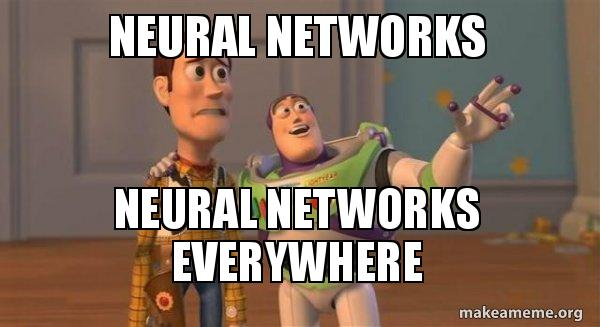

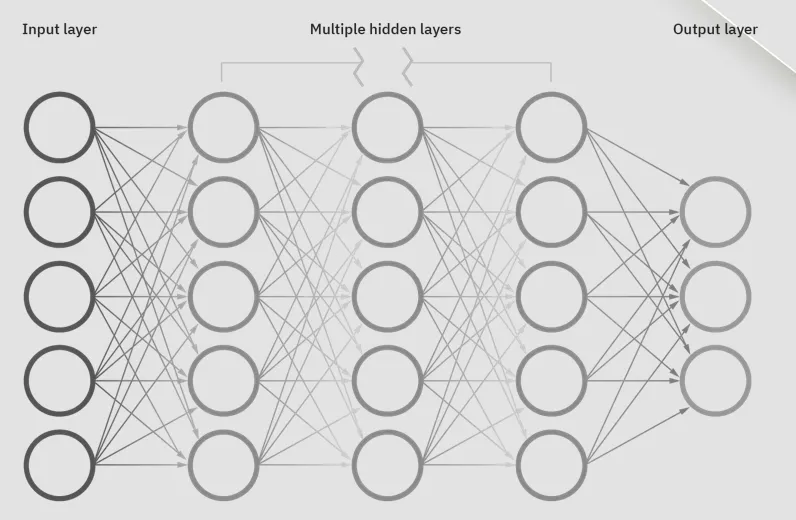

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def do_nn(X_train, y_train):
  model = Sequential()

  model.add(Dense(units = 6, activation = 'relu', input_dim = X_train.shape[1]))
  model.add(Dense(units = 6, activation = 'relu'))
  model.add(Dense(units = 1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(X_train, y_train, batch_size = 10, epochs = 10)

  return model

do_nn(X_train, y_train)

Epoch 1/10
2605/2605 [==============================] - 3s 974us/step - loss: 147.5557 - accuracy: 0.6533
Epoch 2/10
2605/2605 [==============================] - 3s 961us/step - loss: 109.9133 - accuracy: 0.6626
Epoch 3/10
2605/2605 [==============================] - 3s 964us/step - loss: 103.8820 - accuracy: 0.6690
Epoch 4/10
2605/2605 [==============================] - 3s 1ms/step - loss: 100.1880 - accuracy: 0.6706
Epoch 5/10
2605/2605 [==============================] - 3s 964us/step - loss: 95.4596 - accuracy: 0.6725
Epoch 6/10
2605/2605 [==============================] - 2s 957us/step - loss: 88.2065 - accuracy: 0.6702
Epoch 7/10
2605/2605 [==============================] - 2s 955us/step - loss: 85.0916 - accuracy: 0.6669
Epoch 8/10
2605/2605 [==============================] - 3s 1ms/step - loss: 82.6270 - accuracy: 0.6703
Epoch 9/10
2605/2605 [==============================] - 2s 957us/step - loss: 80.0919 - accuracy: 0.6740
Epoch 10/10
2605/2605 [==============================] 

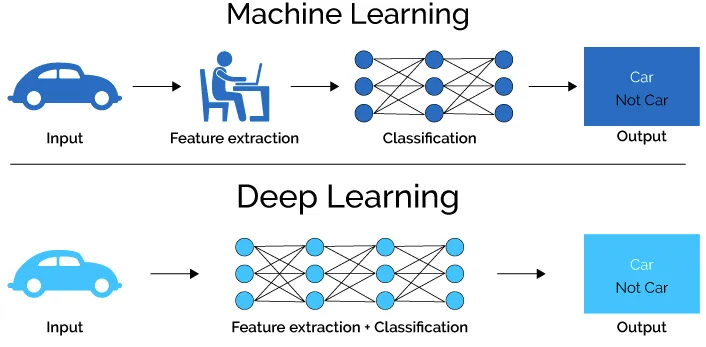

**OMG! Did we make it worse with Neural Nets?**

Ok, we might not be able to use the input data as is. We might need  better way.

In [ ]:
df = pd.read_csv("adult.csv")
X = df.drop(["income","fnlwgt"],axis="columns")
category_col =['workclass', 'education', 'occupation',
               'relationship','native.country','race','sex','marital.status']

X = pd.get_dummies(X,columns = category_col, drop_first=False, dtype=int)
X

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_White,sex_Female,sex_Male,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
0,90,9,0,4356,40,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,82,9,0,4356,18,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,66,10,0,4356,40,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,54,4,0,3900,40,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,0
4,41,10,0,3900,40,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
32557,27,12,0,0,38,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
32558,40,9,0,0,40,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
32559,58,9,0,0,40,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1


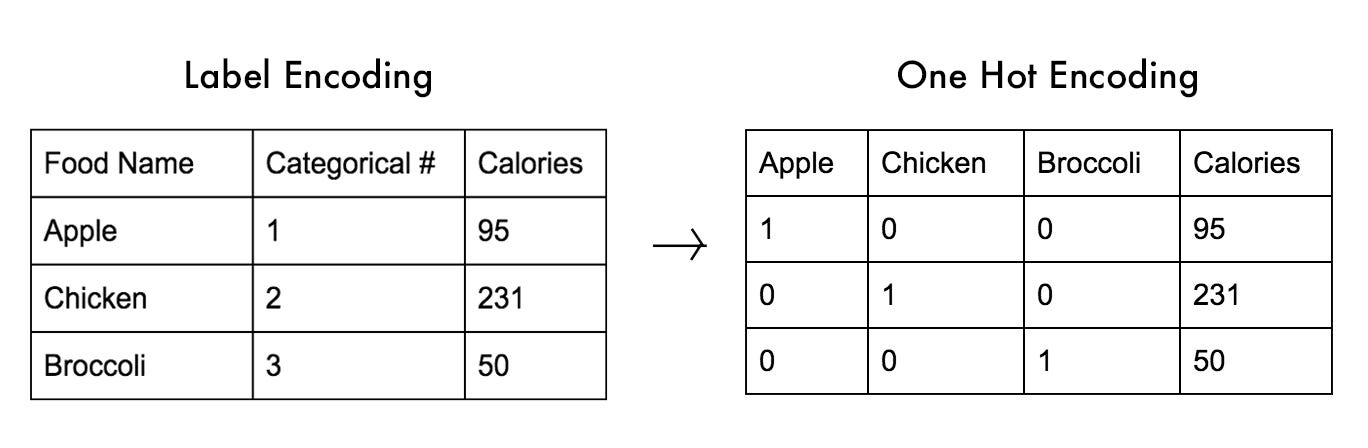

In [ ]:
y = df['income'].map({'<=50K': 0, '>50K': 1})
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
model = do_nn(X_train,y_train)

Epoch 1/10
2605/2605 [==============================] - 3s 995us/step - loss: 0.9406 - accuracy: 0.7828
Epoch 2/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.4071 - accuracy: 0.8109
Epoch 3/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.3908 - accuracy: 0.8315
Epoch 4/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.3860 - accuracy: 0.8330
Epoch 5/10
2605/2605 [==============================] - 3s 965us/step - loss: 0.3798 - accuracy: 0.8380
Epoch 6/10
2605/2605 [==============================] - 3s 969us/step - loss: 0.3772 - accuracy: 0.8351
Epoch 7/10
2605/2605 [==============================] - 2s 956us/step - loss: 0.3672 - accuracy: 0.8397
Epoch 8/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.3504 - accuracy: 0.8424
Epoch 9/10
2605/2605 [==============================] - 3s 962us/step - loss: 0.3476 - accuracy: 0.8410
Epoch 10/10
2605/2605 [==============================] - 3s 960us/step -

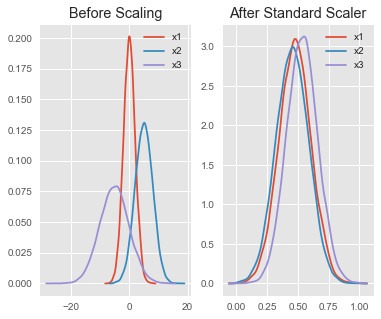

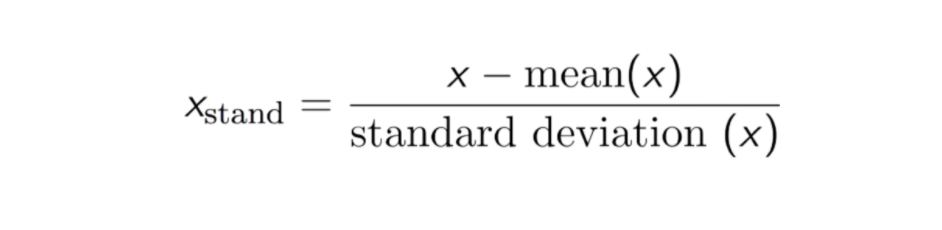
For a more detailed explanation on scaling see [this reference](https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[:5])

[[ 3.76961234e+00 -4.20059624e-01 -1.45920484e-01  1.05935066e+01
  -3.54294470e-02  4.09081281e+00 -1.74295110e-01 -2.62097357e-01
  -1.46638105e-02 -1.51679230e+00 -1.88389328e-01 -2.90935682e-01
  -2.03761449e-01 -2.07399897e-02 -1.71753247e-01 -1.93486624e-01
  -1.16091949e-01 -7.20160099e-02 -1.01649545e-01 -1.42271803e-01
  -1.26644948e-01 -1.84063764e-01 -2.10534334e-01 -4.43657054e-01
  -1.13343872e-01  1.44939722e+00 -2.36373909e-01 -3.96074245e-02
  -1.34195534e-01 -5.37144246e-01  4.08257151e+00 -3.61861434e-01
  -1.66277090e-02 -3.79495169e-01 -3.77745550e-01 -1.77450218e-01
  -2.09577972e-01 -2.55954322e-01 -3.35541333e-01 -6.78016432e-02
  -3.81663381e-01 -1.42608475e-01 -3.55316091e-01 -1.71278873e-01
  -2.27103553e-01 -8.25333347e-01  1.70899099e+00 -1.76249722e-01
  -4.29345818e-01 -3.44032316e-01 -2.24926808e-01 -1.35023272e-01
  -2.41632129e-02 -6.10734231e-02 -4.80487962e-02 -4.26060196e-02
  -5.40937900e-02 -4.64159754e-02 -2.93370850e-02 -5.71494593e-02
  -5.26469

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
model = do_nn(X_train,y_train)

Epoch 1/10
2605/2605 [==============================] - 3s 982us/step - loss: 0.3851 - accuracy: 0.8173
Epoch 2/10
2605/2605 [==============================] - 3s 984us/step - loss: 0.3379 - accuracy: 0.8458
Epoch 3/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.8464
Epoch 4/10
2605/2605 [==============================] - 3s 984us/step - loss: 0.3317 - accuracy: 0.8481
Epoch 5/10
2605/2605 [==============================] - 3s 988us/step - loss: 0.3305 - accuracy: 0.8474
Epoch 6/10
2605/2605 [==============================] - 3s 984us/step - loss: 0.3292 - accuracy: 0.8500
Epoch 7/10
2605/2605 [==============================] - 3s 1ms/step - loss: 0.3293 - accuracy: 0.8490
Epoch 8/10
2605/2605 [==============================] - 3s 989us/step - loss: 0.3287 - accuracy: 0.8498
Epoch 9/10
2605/2605 [==============================] - 3s 994us/step - loss: 0.3280 - accuracy: 0.8486
Epoch 10/10
2605/2605 [==============================] - 3s 987us/st

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trainer=RandomForestClassifier()
model = trainer.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "f"{accuracy:.3f}")

The test accuracy using a RandomForestClassifier is 0.851


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4930
           1       0.72      0.64      0.68      1583

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



Recall what these metrics are:
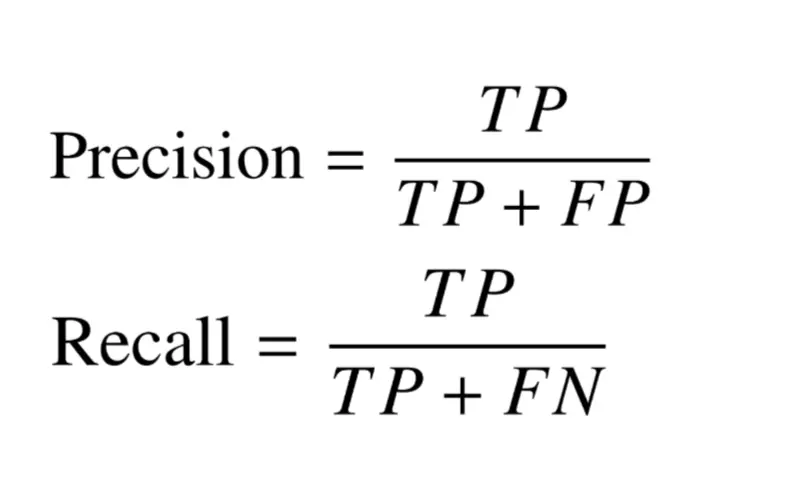

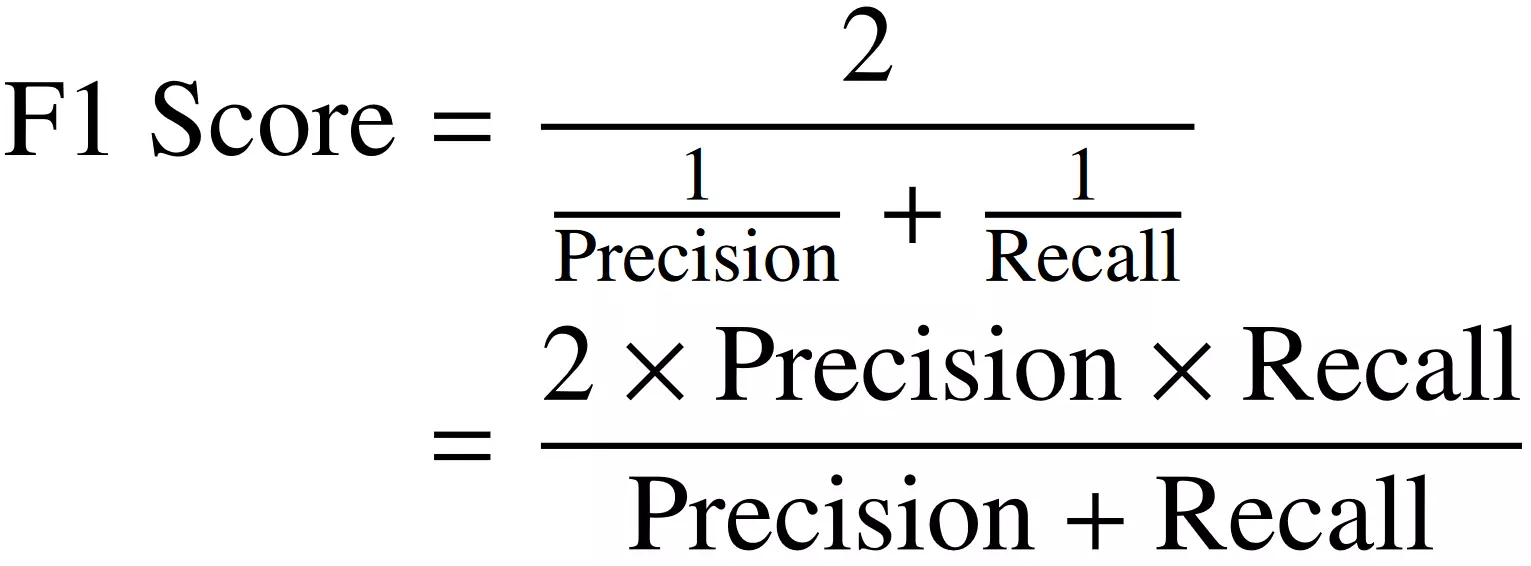

<Axes: >

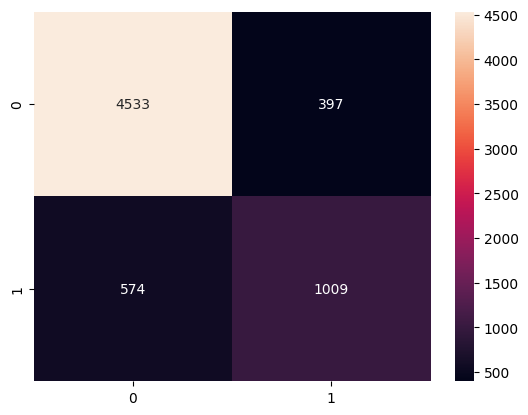

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')